# Задача

Заказчик: <br>
Благотворительный фонд “Бюро добрых дел”<br><br>

Основная цель заказчика заключается в том, чтобы из пула тех клиентов, которые жертвовали за последний год, выявить клиентов, которые могут увеличить частоту или размер пожертвований.<br>
* Данные, которыми располагает заказчик, включают в себя историю платежей жертвователей и какую-то дополнительную информацию за несколько лет по четырём тысячам жертвователей.<br>
* Жизненный цикл жертвователя составляет от полутора до трёх лет, поэтому в истории будут примеры того, как именно меняется характер платежей клиентов.<br>
* Если получится на основе данных сделать дополнительную сегментацию, например выделить характерное поведение пользователей, которые прекращают жертвовать, это также интересует заказчика.
<br><br>

Данные реальные, задача интересная, успешное её решение приведёт к тому, что больше людей получат ту помощь, в которой нуждаются.

## Подготовка данных

In [173]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [174]:
donors = pd.read_excel('Выгрузка для ЯП_2.xlsx', sheet_name='Доноры')
donats = pd.read_excel('Выгрузка для ЯП_2.xlsx', sheet_name='Пожертвования')

display(donors.head(10), donors.info())
display(donats.head(10), donats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ID                               3683 non-null   object        
 1   Пол                              2431 non-null   object        
 2   Город                            1015 non-null   object        
 3   Дата последней email активности  1835 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 115.2+ KB


,ID,Пол,Город,Дата последней email активности
0,AF575B85-917F-475D-8875-00055586E05B,NaN,NaN,NaT
1,229A9B43-3A15-4A48-8CB6-000EDB240D50,NaN,NaN,NaT
2,C6606486-05A8-4437-ACF9-00344E54FEE1,NaN,NaN,NaT
3,6ED86154-A688-4A11-868F-006209035413,Женский ...,NaN,NaT
4,46C41E20-EA56-4698-9C37-00692FD6FFE8,Женский ...,NaN,NaT
5,8CBFF8AB-3153-473A-BE84-0079B873EA33,Мужской ...,NaN,2022-07-18 17:36:39
6,20AC64AC-190E-4091-8D2E-00832BED87C5,Женский ...,NaN,2022-07-18 16:29:53
7,0E516427-6B84-4268-AB70-009E9E1FD026,NaN,NaN,NaT
8,3845EBA8-054E-465D-98CE-00A2758E3F92,NaN,NaN,NaT
9,530A44DC-46A2-48E6-962F-00A67997F7A1,Женский ...,NaN,2022-07-18 16:29:50


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14043 entries, 0 to 14042
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Donor ID            14043 non-null  object        
 1   Дата платежа        14043 non-null  datetime64[ns]
 2   Сумма платежа       14043 non-null  float64       
 3   Рекуррентный        14043 non-null  object        
 4   Назначение платежа  12774 non-null  object        
 5   Канал оплаты        14043 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 658.4+ KB


,Donor ID,Дата платежа,Сумма платежа,Рекуррентный,Назначение платежа,Канал оплаты
0,DE5393F9-9585-4057-B7FB-24B69697FC08,2022-07-03 19:49:48,300.0,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты
1,81CD4BEF-443E-4D36-B34F-664E11182D65,2020-03-14 12:20:02,300.0,Нет ...,SMS bdd,SMS
2,D3BEB76D-D8B6-47E2-8109-44F1B278943B,2022-04-07 00:00:00,16.0,Нет ...,Добровольное пожертвование. НДС не облагается,Прямые поступления на счет
3,F1310736-B229-4AAC-99B7-F13ACECF67CB,2019-12-26 02:25:42,300.0,Нет ...,NaN,SMS
4,61C3D86B-39DA-445C-9D7F-9924CE9BDA14,2021-06-26 01:26:07,200.0,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты
5,6FDEE73B-0270-4AFA-BA21-579E5B970D6A,2017-08-26 18:16:27,100.0,Да ...,Пожертвование в фонд помощи детям-отказникам и...,Банковские карты
6,F66CEFEF-38BB-4E7A-A795-207E19A03005,2017-06-28 14:15:06,2000.0,Да ...,Пожертвование в фонд помощи детям-отказникам и...,Банковские карты
7,C09905A1-2059-4FAB-B74B-F52B5913CF84,2020-06-01 14:43:58,200.0,Да ...,ПОЖЕРТВОВАНИЕ,Банковские карты
8,BBA4E944-A48D-44B8-A0E6-E4FEB6486097,2021-12-07 17:32:21,500.0,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты
9,08C3988B-C0FF-44EE-83BF-5A75E18110D2,2019-11-05 20:59:40,100.0,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты


None

In [175]:
# сравним количество уникальных id в обеих датасетах
display(len(donors['ID'].unique()))
len(donats['Donor ID'].unique())

3683

3683

In [176]:
# т.к. количество уникальных id равны, объединим таблицы в одну,
# предварительно переименовав столбец в donats

donats = donats.rename(columns={'Donor ID' : 'ID'})

df = donats.merge(donors, how='left', on = 'ID')
df.head()

,ID,Дата платежа,Сумма платежа,Рекуррентный,Назначение платежа,Канал оплаты,Пол,Город,Дата последней email активности
0,DE5393F9-9585-4057-B7FB-24B69697FC08,2022-07-03 19:49:48,300.0,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты,Женский ...,Москва,2022-06-03 20:15:57
1,81CD4BEF-443E-4D36-B34F-664E11182D65,2020-03-14 12:20:02,300.0,Нет ...,SMS bdd,SMS,Женский ...,Москва,2022-07-18 17:19:02
2,D3BEB76D-D8B6-47E2-8109-44F1B278943B,2022-04-07 00:00:00,16.0,Нет ...,Добровольное пожертвование. НДС не облагается,Прямые поступления на счет,Мужской ...,NaN,NaT
3,F1310736-B229-4AAC-99B7-F13ACECF67CB,2019-12-26 02:25:42,300.0,Нет ...,NaN,SMS,NaN,NaN,NaT
4,61C3D86B-39DA-445C-9D7F-9924CE9BDA14,2021-06-26 01:26:07,200.0,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты,Женский ...,NaN,2022-07-20 20:32:37


In [177]:
# переименуем столбцы, приведя их к змеиному регистру
df = df.rename(columns = 
              {
                  'ID':'id',
                  'Дата платежа':'date',
                  'Сумма платежа':'amount',
                  'Пол':'gender',
                  'Город':'city',
                  'Назначение платежа' : 'purpose',
                  'Рекуррентный' : 'is_reccurent',
                  'Канал оплаты' : 'channel',
                  'Дата последней email активности': 'last_email_activity'
                  
              }
              )
df.columns

Index(['id', 'date', 'amount', 'is_reccurent', 'purpose', 'channel', 'gender',
       'city', 'last_email_activity'],
      dtype='object')

In [178]:
# приведем данные в столбце 'purpose' к нижнему регистру

df['purpose'] = df['purpose'].str.lower()
df['purpose'].head()

0                         пожертвование  undefined
1                                          sms bdd
2    добровольное пожертвование. ндс не облагается
3                                              NaN
4                         пожертвование  undefined
Name: purpose, dtype: object

In [179]:
# посмотрим процентное соотношение пропусков
df.isna().sum()/len(df['id'])

id                     0.000000
date                   0.000000
amount                 0.000000
is_reccurent           0.000000
purpose                0.090437
channel                0.000000
gender                 0.111799
city                   0.520188
last_email_activity    0.211493
dtype: float64

In [180]:
# заполним пропуски нулями
df = df.fillna('0')
df.isna().sum()/len(df['id'])

id                     0.0
date                   0.0
amount                 0.0
is_reccurent           0.0
purpose                0.0
channel                0.0
gender                 0.0
city                   0.0
last_email_activity    0.0
dtype: float64

In [181]:
# проверим наличие дубликатов
df.duplicated().sum()
df[df.duplicated() == True]

,id,date,amount,is_reccurent,purpose,channel,gender,city,last_email_activity
133,5D288F50-4F0E-4FDF-A026-863590DF3F69,2022-04-28,1.0,Нет ...,благотворительное пожертвование 1.00,Прямые поступления на счет,Мужской ...,0,0
297,5D288F50-4F0E-4FDF-A026-863590DF3F69,2022-04-28,1.0,Нет ...,благотворительное пожертвование 1.00,Прямые поступления на счет,Мужской ...,0,0
1438,5D288F50-4F0E-4FDF-A026-863590DF3F69,2022-04-28,1.0,Нет ...,благотворительное пожертвование 1.00,Прямые поступления на счет,Мужской ...,0,0
2837,5D288F50-4F0E-4FDF-A026-863590DF3F69,2022-04-28,1.0,Нет ...,благотворительное пожертвование 1.00,Прямые поступления на счет,Мужской ...,0,0
5166,FFCCBA23-89CA-4A22-BD8A-7CAD2D9EB7F7,2021-09-13,20.0,Нет ...,добровольное пожертвование. ндс не облагается,Прямые поступления на счет,Женский ...,0,0
7654,FFCCBA23-89CA-4A22-BD8A-7CAD2D9EB7F7,2021-09-13,20.0,Нет ...,добровольное пожертвование. ндс не облагается,Прямые поступления на счет,Женский ...,0,0
9594,D38F6A22-9BEF-4484-B377-ED8ED1DB4553,2021-02-11,1.0,Нет ...,добровольное пожертвование;сумма 1.00 руб.;ком...,Прямые поступления на счет,Женский ...,0,0
10112,FFCCBA23-89CA-4A22-BD8A-7CAD2D9EB7F7,2021-09-13,20.0,Нет ...,добровольное пожертвование. ндс не облагается,Прямые поступления на счет,Женский ...,0,0
10685,5D288F50-4F0E-4FDF-A026-863590DF3F69,2022-04-28,1.0,Нет ...,благотворительное пожертвование 1.00,Прямые поступления на счет,Мужской ...,0,0
11757,5D288F50-4F0E-4FDF-A026-863590DF3F69,2022-04-28,1.0,Нет ...,благотворительное пожертвование 1.00,Прямые поступления на счет,Мужской ...,0,0


In [182]:
# удалим дубликаты
df = df.drop_duplicates()
df.duplicated().sum()

0

In [183]:
# в столбце 'is_reccurent' содержатся значения со множеством пробелов
# заменим их на более удобные 
df['is_reccurent'] = df['is_reccurent'].replace('Да                                                                                                                                                                                                                                                        ',
                                                 1)
df['is_reccurent'] = df['is_reccurent'].replace('Нет                                                                                                                                                                                                                                                       ',
                                                  0)

<AxesSubplot:title={'center':'Распределение количества платежей по годам'}, ylabel='year'>

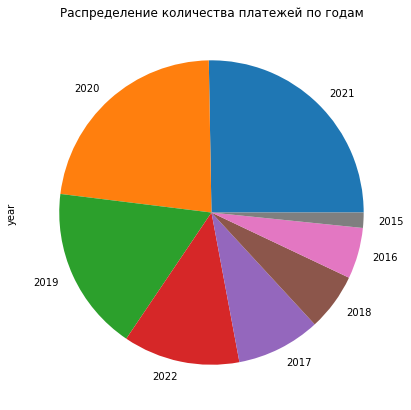

In [184]:
# добавим столбцы с годом, месяцем, датой, номером дня недели платежа
df['weekday'] = df['date'].dt.weekday
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day_of_week'] = df['date'].dt.day_of_week
#удалим столбец с датой
df = df.drop('date',axis=1)

# количество платежей по годам
df['year'].value_counts().plot(title='Распределение количества платежей по годам', kind='pie', figsize=(7,7))

In [185]:
df.head()

,id,amount,is_reccurent,purpose,channel,gender,city,last_email_activity,weekday,month,year,day_of_week
0,DE5393F9-9585-4057-B7FB-24B69697FC08,300.0,1,пожертвование undefined,Банковские карты,Женский ...,Москва,2022-06-03 20:15:57,6,7,2022,6
1,81CD4BEF-443E-4D36-B34F-664E11182D65,300.0,0,sms bdd,SMS,Женский ...,Москва,2022-07-18 17:19:02,5,3,2020,5
2,D3BEB76D-D8B6-47E2-8109-44F1B278943B,16.0,0,добровольное пожертвование. ндс не облагается,Прямые поступления на счет,Мужской ...,0,0,3,4,2022,3
3,F1310736-B229-4AAC-99B7-F13ACECF67CB,300.0,0,0,SMS,0,0,0,3,12,2019,3
4,61C3D86B-39DA-445C-9D7F-9924CE9BDA14,200.0,1,пожертвование undefined,Банковские карты,Женский ...,0,2022-07-20 20:32:37,5,6,2021,5


**Вывод:**  В нашем распоряжении информация о 14043 пожертвований<br>
 Уникальных пользователей (ID): 3683 <br>


## Исследуем пользователей, совершивших повторные пожертвования

### Выделим в отдельный датасет

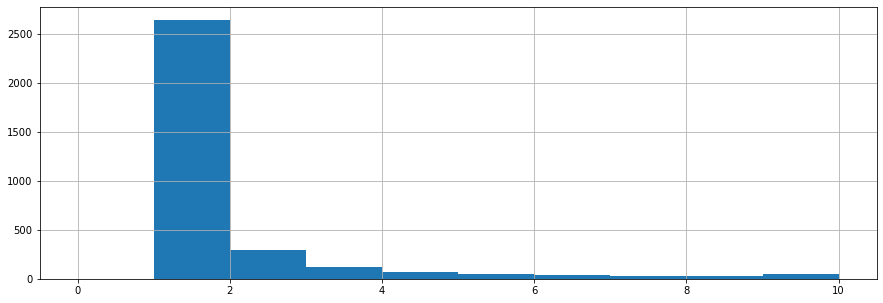

In [186]:
# Сохраним информацию о пользователях, совершивших более одного платежа, в отдельный датасет
# 1. Вычислим количество платежей от одинаковых ID
df1 = df.groupby('id')['id'].count().sort_values(ascending=False)
df1.hist(figsize=(15,5), range=(0,10), bins=10);

**Вывод:**  Среди всех пользователей значительно преобладают жертвователи, совершившие два платежа.<br>

In [187]:
# 2. вычислим количество пользователей, совершивших более одного платежа
(df1>1).sum()

1039

In [188]:
# 3. сохраним ID этих пользователей
repeat = df['id'].value_counts().head(1041).index.tolist()
# 4. сохраним всю информацию о платежах от этих пользователей в датасет
df1 = df[df['id'].isin(repeat)]

df1.head()

,id,amount,is_reccurent,purpose,channel,gender,city,last_email_activity,weekday,month,year,day_of_week
0,DE5393F9-9585-4057-B7FB-24B69697FC08,300.0,1,пожертвование undefined,Банковские карты,Женский ...,Москва,2022-06-03 20:15:57,6,7,2022,6
1,81CD4BEF-443E-4D36-B34F-664E11182D65,300.0,0,sms bdd,SMS,Женский ...,Москва,2022-07-18 17:19:02,5,3,2020,5
2,D3BEB76D-D8B6-47E2-8109-44F1B278943B,16.0,0,добровольное пожертвование. ндс не облагается,Прямые поступления на счет,Мужской ...,0,0,3,4,2022,3
4,61C3D86B-39DA-445C-9D7F-9924CE9BDA14,200.0,1,пожертвование undefined,Банковские карты,Женский ...,0,2022-07-20 20:32:37,5,6,2021,5
5,6FDEE73B-0270-4AFA-BA21-579E5B970D6A,100.0,1,пожертвование в фонд помощи детям-отказникам и...,Банковские карты,Женский ...,0,2022-07-18 16:29:38,5,8,2017,5


## Исследуем и категоризируем данные о постоянных жертвователях

In [189]:
# количество пожертвований от постоянных жертвователей
df1['id'].count()

11389

In [190]:
# среднее количество пожертвований от постоянных жертвователей за все время
df1['id'].count()/len(df1['id'].unique())

10.940441882804995

In [191]:
# доля рекуррентных платежей
(df1[df1['is_reccurent'] == 1]['id'].count()/len(df1['id']))

0.7082272368074458

###  Каналы платежей

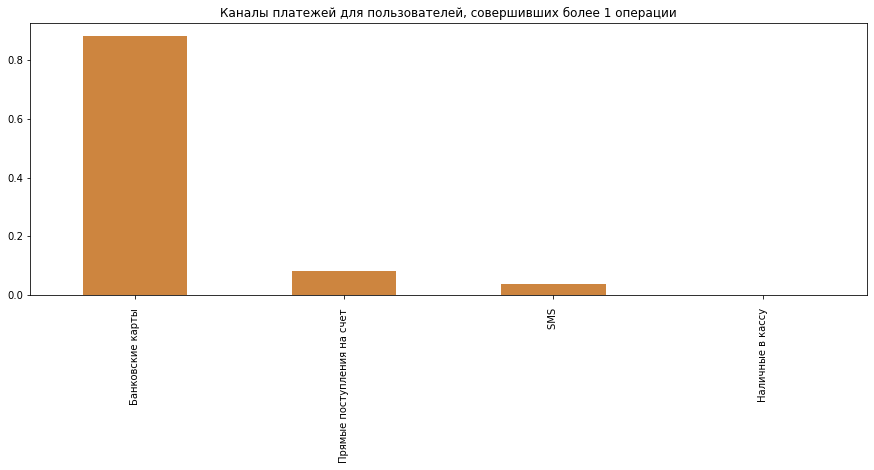

In [192]:
# доля платежей из разных каналов для повторных пожертвований
(df1['channel'].value_counts()/len(df1['id'])).plot(
    title='Каналы платежей для пользователей, совершивших более 1 операции',
    kind='bar', 
    figsize=(15,5),
    color='peru'
);

###  Города постоянных жертвователей

In [193]:
# количество городов в датасете
len(df1['city'].unique())

120

In [194]:
# топ городов по количеству постоянных жертвователей

(df1['city'].value_counts()/len(df1['id'])).head(20)

0                    0.452366
Москва               0.303012
Санкт-Петербург      0.039775
Краснодар            0.018527
Якутск               0.011327
Мытищи               0.008166
Екатеринбург         0.007727
Самара               0.007639
Frankfurt am Main    0.007288
Изобильный           0.006673
Сочи                 0.006585
Ростов-на-Дону       0.006585
Одинцово             0.006146
Нижний Новгород      0.005883
Брянск               0.004741
Воронеж              0.004390
Charleston           0.004302
Казань               0.004127
Владивосток          0.003512
Ставрополь           0.003424
Name: city, dtype: float64

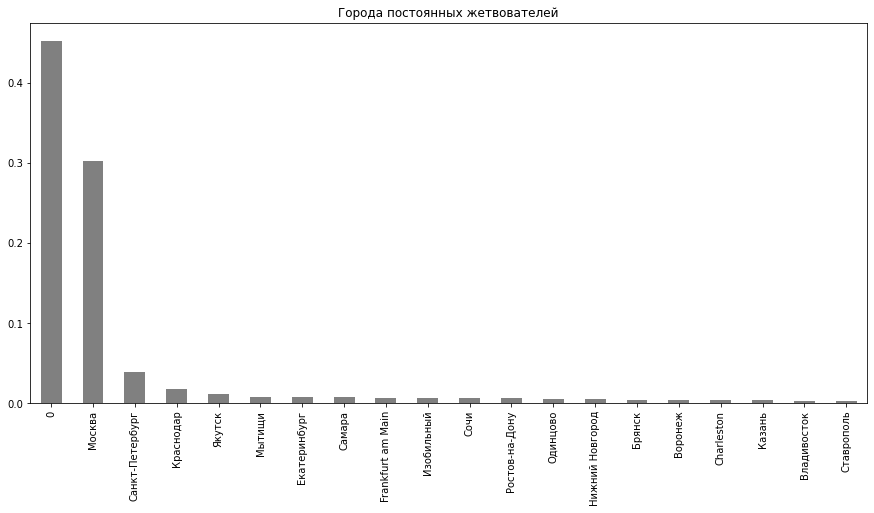

In [195]:
(df1['city'].value_counts()/len(df1['id'])).head(20).plot(
    title='Города постоянных жетвователей',
    kind='bar', 
    figsize=(15,7),
    color='gray'
);

In [196]:
# Напишем функцию для категоризации городов

def city_category(city):
    foreign_cities = ['Frankfurt am Main', 'Charleston', 'Helsinki', 'Juba', 'Copenhagen', 'Holon', 
                     'Hyderabad', 'Alameda', 'Jakarta', 'Keighley', 'Southall', 'Denver']
    
    if city.loc['city'] == 'Москва':
        return 'Москва'
    elif city.loc['city'] == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif city.loc['city'] in foreign_cities:
        return 'Зарубежные страны'
    elif city.loc['city'] == '0':
        return 'Город неизвестен'
    else:
        return 'Другие города России'

df1['city'] = df1['city'].fillna(0)
# применим функцию
df1['city_category'] = df1.apply(city_category, axis=1)
# удалим столбец 'city'
df1 = df1.drop('city',axis=1)

df1.head()

,id,amount,is_reccurent,purpose,channel,gender,last_email_activity,weekday,month,year,day_of_week,city_category
0,DE5393F9-9585-4057-B7FB-24B69697FC08,300.0,1,пожертвование undefined,Банковские карты,Женский ...,2022-06-03 20:15:57,6,7,2022,6,Москва
1,81CD4BEF-443E-4D36-B34F-664E11182D65,300.0,0,sms bdd,SMS,Женский ...,2022-07-18 17:19:02,5,3,2020,5,Москва
2,D3BEB76D-D8B6-47E2-8109-44F1B278943B,16.0,0,добровольное пожертвование. ндс не облагается,Прямые поступления на счет,Мужской ...,0,3,4,2022,3,Город неизвестен
4,61C3D86B-39DA-445C-9D7F-9924CE9BDA14,200.0,1,пожертвование undefined,Банковские карты,Женский ...,2022-07-20 20:32:37,5,6,2021,5,Город неизвестен
5,6FDEE73B-0270-4AFA-BA21-579E5B970D6A,100.0,1,пожертвование в фонд помощи детям-отказникам и...,Банковские карты,Женский ...,2022-07-18 16:29:38,5,8,2017,5,Город неизвестен


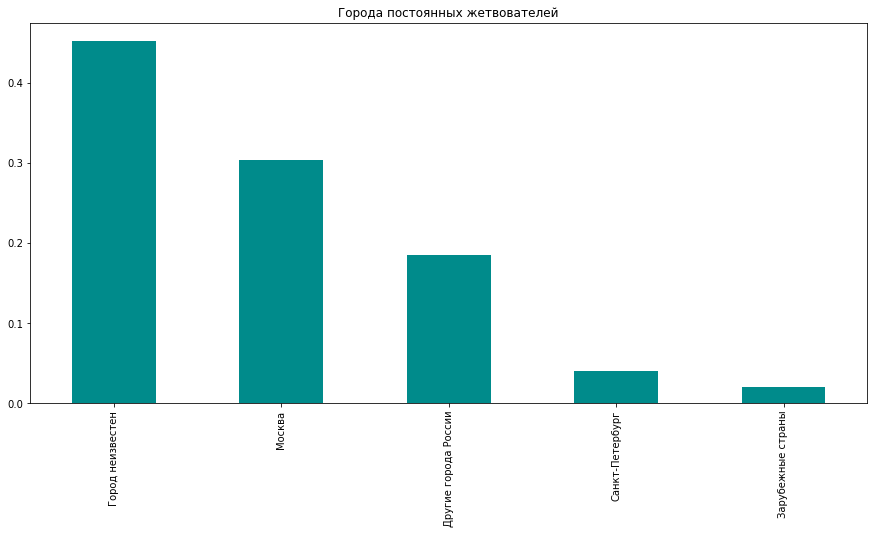

In [197]:
(df1['city_category'].value_counts()/len(df1['id'])).head(20).plot(
    title='Города постоянных жетвователей',
    kind='bar', 
    figsize=(15,7),
    color='darkcyan'
);

### Назначения пожертвований

In [198]:
# назначение пожертвования
# количество уникальных назначений
len(df1['purpose'].unique())

648

<AxesSubplot:>

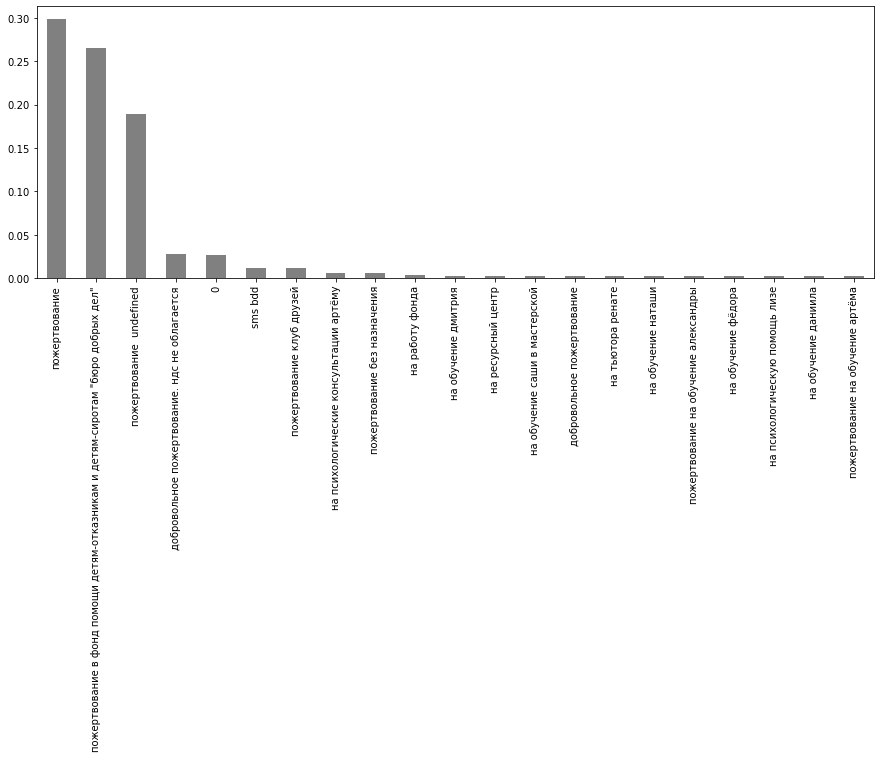

In [199]:
# доли назначений платежей
(df1['purpose'].value_counts()/len(df1['id'])).head(21).plot(kind='bar',figsize=(15,5), color='gray')

In [200]:
# доля назначений пожертвований
(df1['purpose'].value_counts()/len(df1['id'])).head(21)

пожертвование                                                                     0.298270
пожертвование в фонд помощи детям-отказникам и детям-сиротам "бюро добрых дел"    0.265695
пожертвование  undefined                                                          0.189481
добровольное пожертвование. ндс не облагается                                     0.027395
0                                                                                 0.027044
sms bdd                                                                           0.012293
пожертвование клуб друзей                                                         0.011151
на психологические консультации артёму                                            0.006497
пожертвование без назначения                                                      0.005795
на работу фонда                                                                   0.003161
на обучение дмитрия                                                               0.002810

In [201]:
# изменим тип данных в столбце 'purpose' на object
df1['purpose'] = df1['purpose'].astype('object')

In [202]:
# Напишем функцию для категоризации назначений платежей

def purose_category(purpose):
    
    if 'история успеха' in purpose.loc['purpose']:
        return 'история успеха'
    elif ('на обучение' or 'на тьютора' or 'на психологическую помощь') in purpose.loc['purpose']:
        return 'именное пожертвование'
    elif 'окно в мир' in purpose.loc['purpose']:
        return 'окно в мир'
    elif 'sms' in purpose.loc['purpose']:
        return 'sms'
    elif 'клуб друзей' in purpose.loc['purpose']:
        return 'клуб друзей'
    elif '0' in purpose.loc['purpose']:
        return 'клуб друзей'
    else:
        return 'пожертвование'



# применим функцию
df1['purpose_category'] = df1.apply(purose_category, axis=1)
# удалим столбец 'purpose'
df1 = df1.drop('purpose',axis=1)

df1.head()

,id,amount,is_reccurent,channel,gender,last_email_activity,weekday,month,year,day_of_week,city_category,purpose_category
0,DE5393F9-9585-4057-B7FB-24B69697FC08,300.0,1,Банковские карты,Женский ...,2022-06-03 20:15:57,6,7,2022,6,Москва,пожертвование
1,81CD4BEF-443E-4D36-B34F-664E11182D65,300.0,0,SMS,Женский ...,2022-07-18 17:19:02,5,3,2020,5,Москва,sms
2,D3BEB76D-D8B6-47E2-8109-44F1B278943B,16.0,0,Прямые поступления на счет,Мужской ...,0,3,4,2022,3,Город неизвестен,пожертвование
4,61C3D86B-39DA-445C-9D7F-9924CE9BDA14,200.0,1,Банковские карты,Женский ...,2022-07-20 20:32:37,5,6,2021,5,Город неизвестен,пожертвование
5,6FDEE73B-0270-4AFA-BA21-579E5B970D6A,100.0,1,Банковские карты,Женский ...,2022-07-18 16:29:38,5,8,2017,5,Город неизвестен,пожертвование


<AxesSubplot:title={'center':'Назначения платежей для постоянных жертвователей'}>

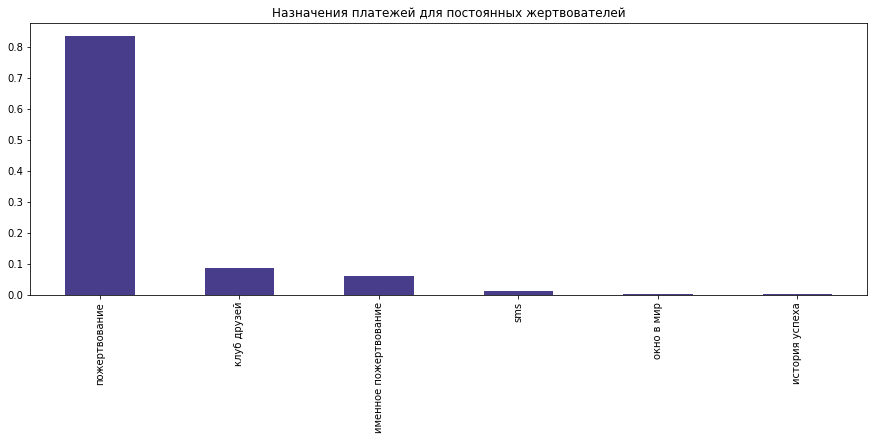

In [203]:
# Назначения платежей
(df1['purpose_category'].value_counts()/len(df1['id'])).head(21).plot(title='Назначения платежей для постоянных жертвователей', kind='bar',figsize=(15,5), color='darkslateblue')